## 1 - Linear Models

Some terminology:
<br><br>***X: Independed variable*** used to predict the response.
<br>***y: Response*** dependent variable we're trying to predict.
<br>$\mathbf{\beta_0}$***: Intercept*** of the regression line; the predicted value when X=0.
<br>$\mathbf{\beta_1}$***: Regression coefficient*** is the slope of regression line.
<br>***Residual*** or error is the difference between the observed values and the fitted values.

### 1.1 - Ordinary Least Squares

Here we try to predict the $y$ variable from $X$ using a linear relationship:
$$ y = \beta_0 + \beta_1X $$

Correlation is another way to measure how two variables are related. The difference is that while correlation measures the strength of an association between two variables, regression quantifies the nature of the relationship.

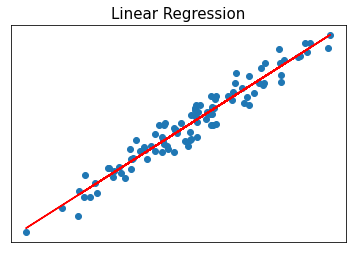

Coefficients: [42.61943029]
Intercept: -0.8141818270307253


In [442]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Generate data sample
X, y = make_regression(100,1,noise=10, random_state=0)

regr = LinearRegression(normalize=True)
regr.fit(X, y)
y_pred = regr.predict(X)

plt.scatter(X,y)
plt.plot(X,y_pred,'r')
plt.xticks(())
plt.yticks(())
plt.title('Linear Regression',fontsize=15)
plt.show()

# The coefficients
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

### 1.2 - Ridge

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty $\alpha$ on the size of the coefficients.

In [126]:
from sklearn.linear_model import Ridge

regr = Ridge(alpha=0.001)
regr.fit(X, y)
y_pred = regr.predict(X)

We can find the value of $\alpha$ by leave-one-out Cross-Validation:

In [123]:
from sklearn.linear_model import RidgeCV

regr = RidgeCV(alphas=np.logspace(-5, 5, 20))
regr.fit(X, y)
regr.alpha_

0.0012742749857031334

### 1.3 - Lasso

Lasso is another regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.

In [127]:
from sklearn.linear_model import Lasso

regr = Lasso(alpha=0.1)
regr.fit(X, y)
y_pred = regr.predict(X)

Again $\alpha$ can be estimate by cross-validation:

In [94]:
from sklearn.linear_model import LassoCV

regr = LassoCV(cv=20)
regr.fit(X, y)
regr.alpha_

0.043293951785745716

### 1.4 - Bayesian Ridge

Bayesian Ridge estimates a probabilistic model of the regression problem by introducing uninformative priors over the hyper parameters of the model. 

In [128]:
from sklearn.linear_model import BayesianRidge

regr = BayesianRidge()
regr.fit(X, y)
y_pred = regr.predict(X)

### 1.5 - Generalized Linear Models (GLM)

The GLM generalizes linear regression by allowing the linear model to be related to the response variable via a link function and allows the response variable to have an error distribution other than the normal distribution.<br>
<br>power = 0: Normal distribution
<br>power = 1, link='log': Poisson distribution
<br>power = 2, link='log': Gamma distribution
<br>power = 3: Inverse Gaussian distribution

In [129]:
from sklearn.linear_model import TweedieRegressor

regr = TweedieRegressor(power=1, alpha=0.5, link='log')
regr.fit(X, y)
y_pred = regr.predict(X)

### 1.6 - Stochastic Gradient Descent (SGD)

Stochastic gradient descent is a simple yet very efficient approach to fit linear models. It is particularly useful when the number of samples (and the number of features) is very large (> 10.000). <br><br>
SGDRegressor supports the following loss functions:<br>
<br>loss = "squared_loss":  Ordinary least squares
<br>loss = "huber":  Huber loss for robust regression
<br>loss = "epsilon_insensitive":  linear Support Vector Regression

In [130]:
from sklearn.linear_model import SGDRegressor

regr = SGDRegressor()
regr.fit(X, y)
y_pred = regr.predict(X)

## 2 - Nonlinear Models

### 2.1 - Support Vector Machine (SVM) Regression

The SVR by setting decision boundaries try to estimate the best hyperplane which fits the data and covers the majority of time-points. <br>
The advatage of SVM is its effectiveness if the number of dimensions is greater than the number of samples, also it's memory efficient, and it accepts both linear and nonlinear kernel functions, so it's versatile. <br><br>
SVM Terminology: <br>
**Kernel:** A kernel helps us find a hyperplane in the higher dimensional space without increasing the computational cost. Usually, the computational cost will increase if the dimension of the data increases. This increase in dimension is required when we are unable to find a separating hyperplane in a given dimension and are required to move in a higher dimension. <br>
**Hyperplane:** This is basically a separating line between two data classes in SVM. But in Support Vector Regression, this is the line that will be used to predict the continuous output. <br>
**Decision Boundary:** A decision boundary can be thought of as a demarcation line (for simplification) on one side of which lie positive examples and on the other side lie the negative examples. On this very line, the examples may be classified as either positive or negative. This same concept of SVM will be applied in Support Vector Regression as well

R2 score of Linear model =  -0.19
R2 score of Polynomial model =  0.88
R2 score of RBF model =  0.37


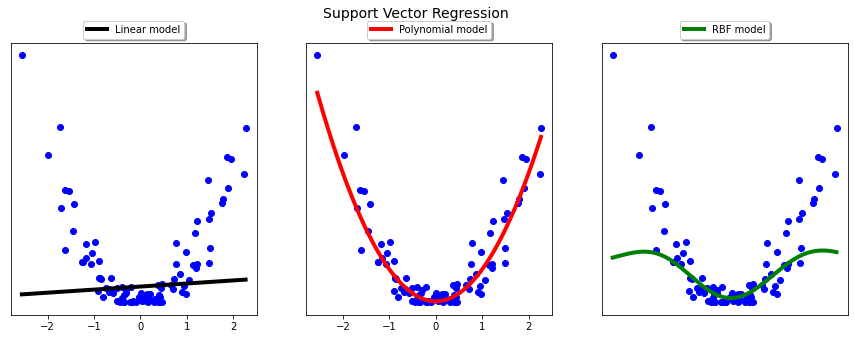

In [450]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.svm import SVR

# Generate data sample
X, y = make_regression(100,1,noise=10, random_state=0)
y=y*y

# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma='auto')
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=2)

# Look at the results
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

svrs = [svr_lin, svr_poly, svr_rbf]
kernel_label = ['Linear', 'Polynomial', 'RBF']
model_color = ['k', 'r', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)
for ix, svr in enumerate(svrs):
    
    axes[ix].plot(X_grid, svr.fit(X, y).predict(X_grid), color=model_color[ix],
                  label='{} model'.format(kernel_label[ix]), linewidth=4)
    axes[ix].scatter(X[svr.support_], y[svr.support_], color = 'b')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)
    plt.xticks(())
    plt.yticks(())
    
    print('R2 score of {} model = '.format(kernel_label[ix]),
          round(metrics.r2_score(y, svr.fit(X, y).predict(X)),2))
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

### 2.2 - K-Nearest Neighbors (KNN) Regression

**KNN Regressor** implements learning based on the  nearest neighbors of each query point, where $k$ is an integer value specified by the user. <br><br>
weights =
<br>
**'uniform'** each point in the local neighborhood contributes uniformly to the classification of a query point.
<br>
**'distance'** nearby points contribute more to the regression than faraway points. 

R2 score of uniform weight =  0.84
R2 score of distance weight =  1.0


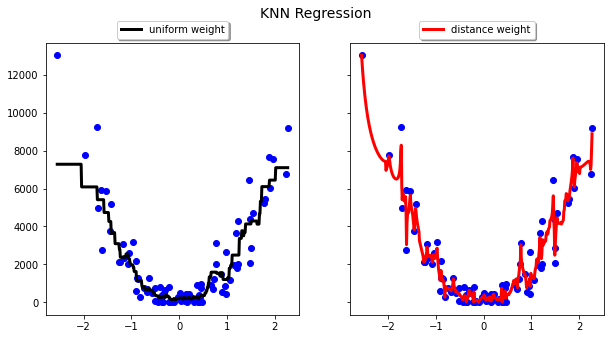

In [305]:
from sklearn.neighbors import KNeighborsRegressor

# Fit regression model
knn_uniform = KNeighborsRegressor(n_neighbors=4)
knn_distance = KNeighborsRegressor(n_neighbors=4, weights='distance')

# Look at the results
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

knns = [knn_uniform, knn_distance]
knn_label = ['uniform', 'distance']
model_color = ['k', 'r']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)
for ix, knn in enumerate(knns):
    
    axes[ix].plot(X_grid, knn.fit(X, y).predict(X_grid), color=model_color[ix],
                  label='{} weight'.format(knn_label[ix]), linewidth=3)
    axes[ix].scatter(X, y, color = 'b')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)
    
    print('R2 score of {} weight = '.format(knn_label[ix]),
          round(metrics.r2_score(y, knn.fit(X, y).predict(X)),2))
    
fig.suptitle("KNN Regression", fontsize=14)
plt.show()

We can automatically tune the parameters of the model in two ways: **Grid Search** and **Randomized Parameter Optimization**.

##### 2.2.1 Grid Search

In [430]:
from sklearn.model_selection import GridSearchCV
params = {"n_neighbors": np.arange(1,5),
         "metric": ["euclidean","cityblock"]}
grid = GridSearchCV(estimator=knn, param_grid=params)
grid.fit(X,y)
print("Score = ", grid.best_score_)
print("n_neighbors = ", grid.best_estimator_.n_neighbors)

Score =  0.6727750397253914
n_neighbors =  3


##### 2.2.2 Randomized Parameter Optimization

In [433]:
from sklearn.model_selection import RandomizedSearchCV
params = {"n_neighbors": range(1,5),
         "weights": ["uniform","distance"]}
rsearch = RandomizedSearchCV(estimator=knn,
                            param_distributions=params,
                            cv=4,
                            n_iter=8,
                            random_state=5)
rsearch.fit(X, y)
print("Score = ", rsearch.best_score_)

Score =  0.719848597673149


##### 2.2.3 Cross Validation

In [435]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(knn,X,y,cv=4))

[0.82543857 0.90522179 0.581685   0.58952043]


### 2.3 - Gaussian Process Regression (GPR)

The GaussianProcessRegressor implements Gaussian processes (GP) for regression purposes. For this, the prior of the GP needs to be specified. The prior mean is assumed to be constant and zero (for normalize_y=False) or the training data’s mean (for normalize_y=True). The prior’s covariance is specified by passing a kernel object. 

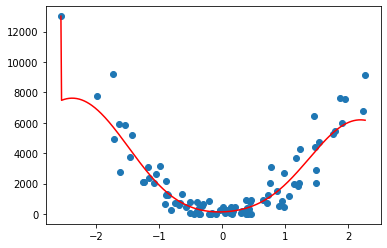

In [368]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic

kernel =  RBF() + RationalQuadratic()
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

gpr = GaussianProcessRegressor(kernel=kernel)
gpr.fit(X, y)
y_pred = gpr.predict(X_grid)

plt.scatter(X,y)
plt.plot(X_grid,y_pred,'r')
plt.show()

### 2.4 - Decision Tree Regression

Decision tree builds regression models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. <br><br>
Predicting a continuous value (regression) with a tree follows the same logic and procedure as in classification, except that impurity is measured by squared deviations from the mean (squared errors) in each subpartition, and predictive performance is judged by the square root of the mean squared error (RMSE) in each partition.

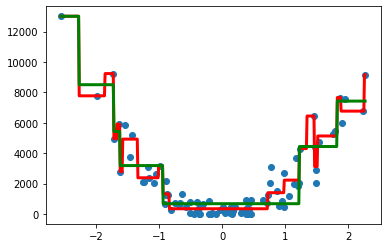

R2 score with max_depth 5 =  0.96
R2 score with max_depth 3 =  0.88


In [394]:
from sklearn.tree import DecisionTreeRegressor

X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

regr_1 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
y_pred_1 = regr_1.predict(X_grid)

regr_2 = DecisionTreeRegressor(max_depth=3)
regr_2.fit(X, y)
y_pred_2 = regr_2.predict(X_grid)

plt.scatter(X,y)
plt.plot(X_grid,y_pred_1,'r', linewidth=3)
plt.plot(X_grid,y_pred_2,'g', linewidth=3)
plt.show()

print('R2 score with max_depth 5 = ', round(metrics.r2_score(y, regr_1.predict(X)),2))
print('R2 score with max_depth 3 = ', round(metrics.r2_score(y, regr_2.predict(X)),2))

### 2.5 - Random Forest Regression

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. <br><br>
Parameters:
<br>**n_estimators** The number of trees in the forest.
<br>**max_depth** The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
<br>**min_samples_split** The minimum number of samples required to split an internal node.
<br>**max_features** The number of features to consider when looking for the best split.
<br>**max_leaf_nodes** Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.


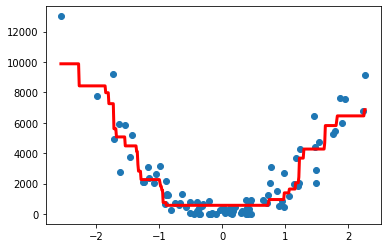

R2 score =  0.89


In [413]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=10, max_features=1, max_leaf_nodes=5,random_state=42)
regr.fit(X, y)
y_pred = regr.predict(X_grid)

plt.scatter(X,y)
plt.plot(X_grid,y_pred,'r', linewidth=3)
plt.show()
print('R2 score = ', round(metrics.r2_score(y, regr.predict(X)),2))

### Bonus - Voting Regression

The idea behind the VotingRegressor is to combine conceptually different machine learning regressors and return the average predicted values. Such a regressor can be useful for a set of equally well performing models in order to balance out their individual weaknesses.

In [424]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor

X, y = make_regression(100,1,noise=10, random_state=0)
y = y*y

reg1 = KNeighborsRegressor()
reg2 = DecisionTreeRegressor()
reg3 = RandomForestRegressor()
reg4 = GradientBoostingRegressor()

ereg = VotingRegressor([('knn', reg1), ('dt', reg2), ('rf', reg3), ('gb', reg4)])

for reg, label in zip([reg1, reg2, reg3, reg4, ereg], ['K-Neighbors', 'Decision Tree',
                                                       'Random Forest', 'Gradient Boosting', 'Ensemble']):
    reg.fit(X,y)
    y_pred = reg.predict(X)
    print("R2 score: %0.2f [%s]" % (round(metrics.r2_score(y, y_pred),2), label))

R2 score: 0.86 [K-Neighbors]
R2 score: 1.00 [Decision Tree]
R2 score: 0.97 [Random Forest]
R2 score: 0.99 [Gradient Boosting]
R2 score: 0.98 [Ensemble]


## 3 - Regression Performance Metrics

The **Explained Variance** computes the deviation in variance  of predicted value $\hat{y}$ from the true value $y$ :
<br><br>
\begin{align}
\mathbf{EV}(y,\hat{y}) & = 1- \frac{Var \langle y-\hat{y} \rangle }{Var \langle y \rangle }\\
\end{align}
The best possible score is 1.0, lower values are worse.

The **Mean Squared Error** meausres the average squared difference between the predicted values and the true value:
<br><br>
\begin{align}
\mathbf{MSE}(y,\hat{y}) & = \frac{1}{n_{samples}} \sum_{i=0}^{n_{samples}-1} (y_i-\hat{y_i})^2 \\
\end{align}

The $\mathbf{R^2\;score}$  represents the proportion of variance that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.
<br><br>
\begin{align}
\mathbf{R^2}(y,\hat{y}) & = 1- \frac{\sum_{i=1}^{n} (y_i-\hat{y_i})^2}{\sum_{i=1}^{n} (y_i-\bar{y})^2}\\
\end{align}
The best possible score is 1.0, lower values are worse.

In [ ]:
from sklearn import metrics

metrics.explained_variance_score(y_true, y_pred)
metrics.mean_squared_error(y_true, y_pred)
metrics.r2_score(y_true, y_pred)